## Clustering the Riders
Intro etc.

In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from src.dbops import fetch_riders, fetch_stages, assign_clusters
from src.kmeans_selection import PREPROCESSORS, SPECIALTIES, compute_inertia_silhouette, plot_inertia_silhouette, model_summary

### Loading the Riders

In [3]:
project = ["name", "nationality", "weight", "height", "points"]
riders = fetch_riders(project=project)
riders = pd.json_normalize(riders)
riders.head()

,name,nationality,weight,height,points.classic,points.gc,points.tt,points.sprint,points.climber
0,david-zabriskie,United States,67.0,183.0,62,1058,3065,204,185
1,lance-armstrong,United States,72.0,178.0,3827,3642,3813,2732,1653
2,alexandre-vinokourov,Kazakhstan,68.0,177.0,3008,5726,4500,3510,3240
3,george-hincapie,United States,83.0,191.0,4618,2389,2331,4370,593
4,laszlo-bodrogi,France,NaN,187.0,828,1074,4949,796,76


### Exploring the Data

In [4]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1144 non-null   object 
 1   nationality     1144 non-null   object 
 2   weight          904 non-null    float64
 3   height          909 non-null    float64
 4   points.classic  1144 non-null   int64  
 5   points.gc       1144 non-null   int64  
 6   points.tt       1144 non-null   int64  
 7   points.sprint   1144 non-null   int64  
 8   points.climber  1144 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 80.6+ KB


In [5]:
riders["nationality"].value_counts().head()

Italy          229
France         143
Spain          142
Belgium         84
Netherlands     63
Name: nationality, dtype: int64

In [6]:
riders.describe()

,weight,height,points.classic,points.gc,points.tt,points.sprint,points.climber
count,904.000000,909.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,67.943164,179.734873,1012.689685,1124.481643,585.657343,1385.208042,689.392483
std,8.082813,6.288503,1422.739727,1366.344273,1060.479393,1953.592008,1141.749588
min,1.750000,159.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,64.000000,175.000000,248.000000,316.750000,47.000000,317.750000,96.000000
50%,68.000000,180.000000,548.000000,660.000000,181.500000,751.500000,287.000000
75%,73.000000,184.000000,1170.250000,1343.250000,620.750000,1582.000000,774.500000
max,94.000000,199.000000,15680.000000,12409.000000,10687.000000,22714.000000,13660.000000


### Selecting the Best K-Means Model
#### Plotting the Inertia & Silhouette Score for Different Strategies

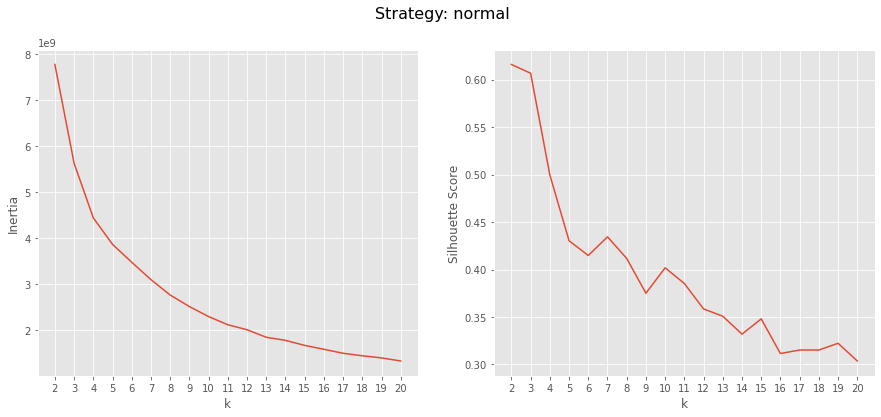

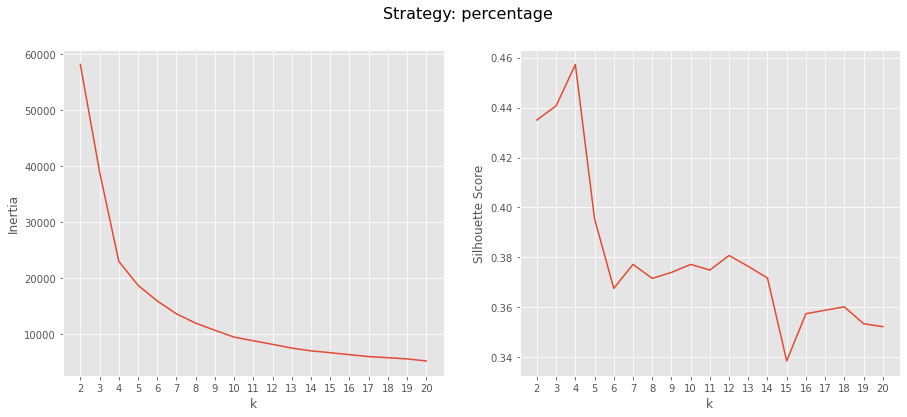

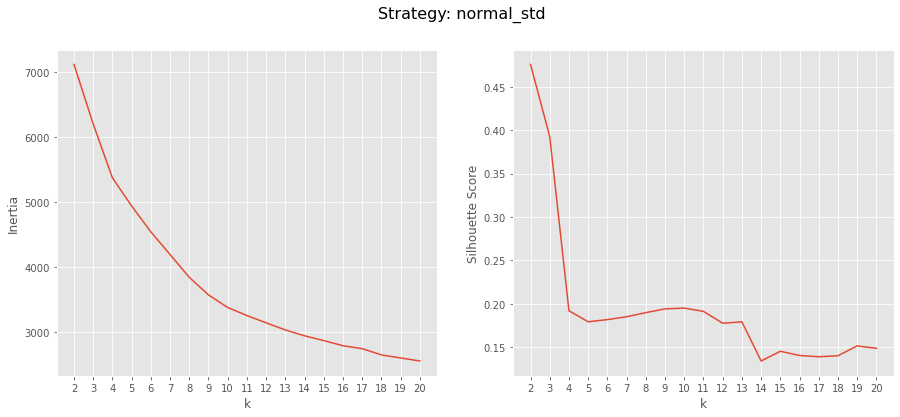

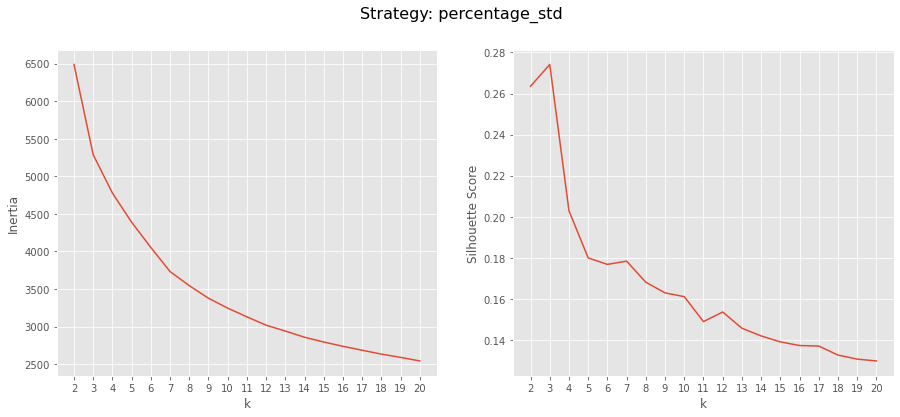

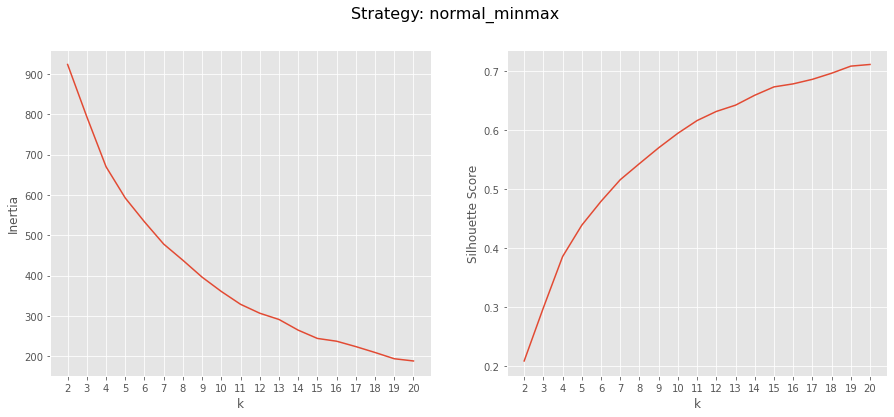

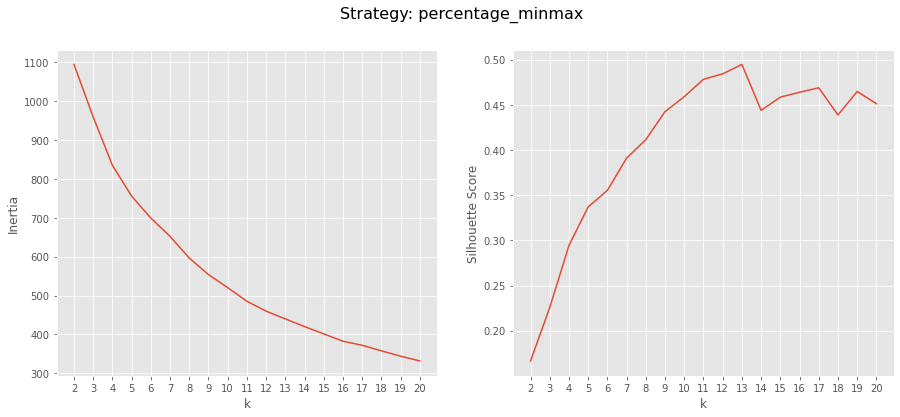

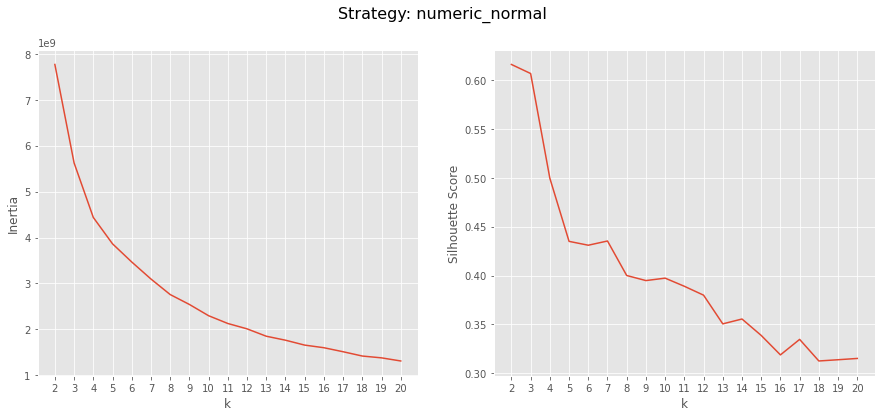

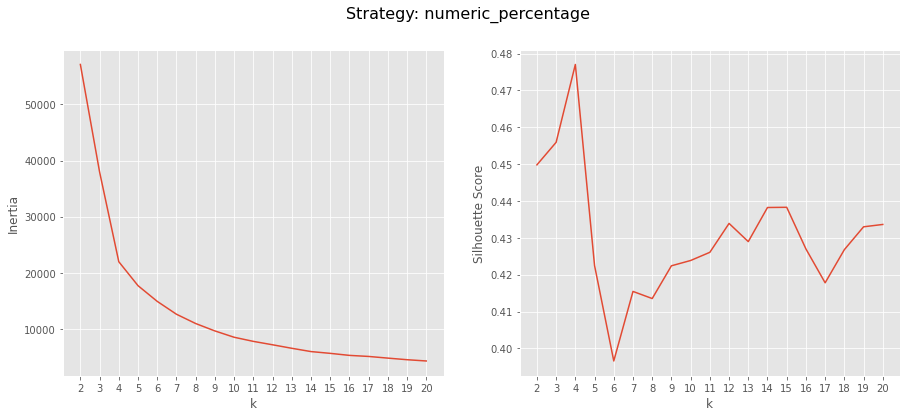

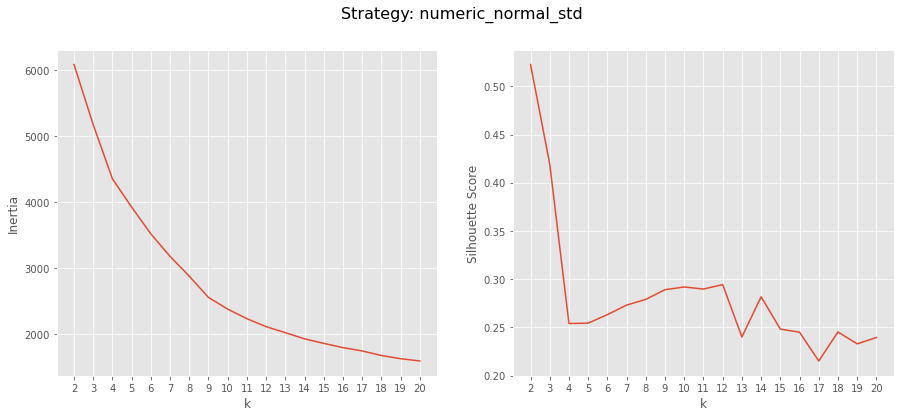

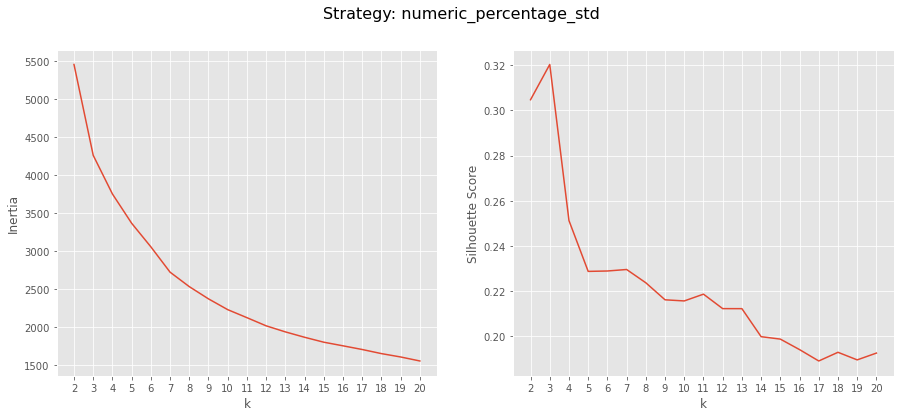

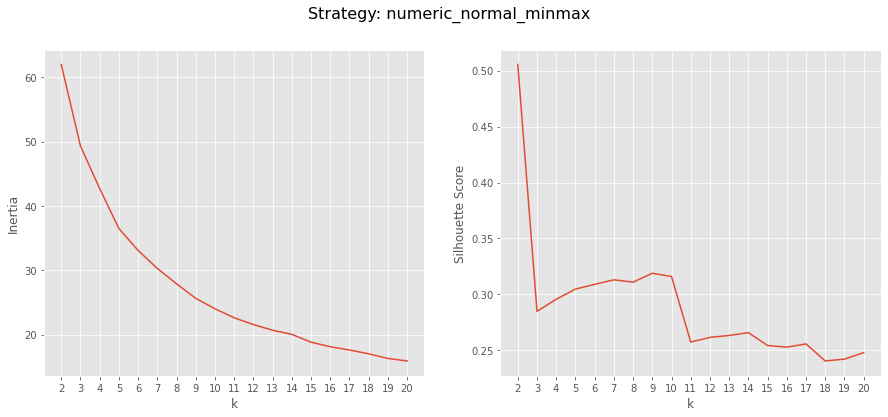

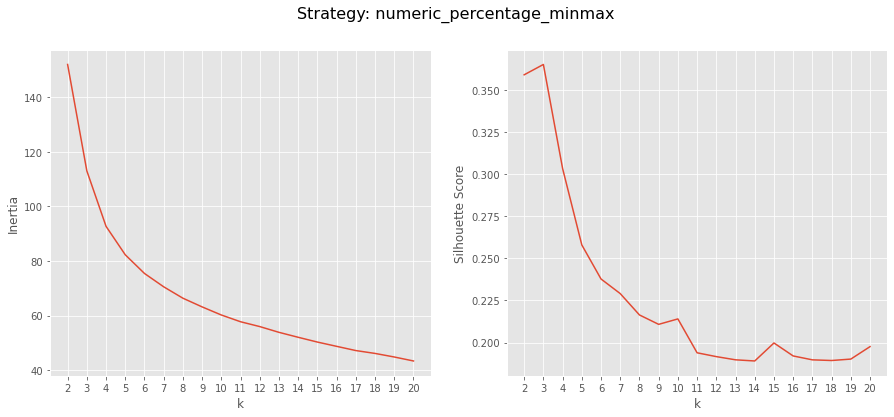

In [7]:
for strategy, preprocessor in PREPROCESSORS.items():
    inertia, silhouette = compute_inertia_silhouette(riders, preprocessor)
    plot_inertia_silhouette(inertia, silhouette, strategy)

#### Inspecting the Most Promising Combinations

In [8]:
# Summary for strat=normal, k=6
model_summary(riders, "normal", 6)

_____________K-Means with strategy 'normal' and 6 clusters: Summary_____________
Inertia: 3468583880.554872
Silhouette score: 0.4335147809213511

Riders in cluster 0: 169
Riders in cluster 1: 727
Riders in cluster 2: 23
Riders in cluster 3: 27
Riders in cluster 4: 38
Riders in cluster 5: 160

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  147.000000  147.000000      169.000000   169.000000   169.000000   
mean    65.343537  178.360544      859.372781  2286.698225  1125.834320   
std      5.493397    5.971331      637.310016   829.452687   938.218427   
min     48.000000  162.000000       45.000000  1021.000000     2.000000   
25%     62.000000  175.000000      415.000000  1624.000000   389.000000   
50%     65.000000  178.000000      674.000000  2085.000000   803.000000   
75%     69.000000  183.000000     1200.000000  2777.000000  1605.000000   
max     79.000000  191.00

In [9]:
# Summary for strat=normal_, k=8
model_summary(riders, "normal", 8)

_____________K-Means with strategy 'normal' and 8 clusters: Summary_____________
Inertia: 2755237482.345639
Silhouette score: 0.38709898732371134

Riders in cluster 0: 625
Riders in cluster 1: 73
Riders in cluster 2: 36
Riders in cluster 3: 27
Riders in cluster 4: 6
Riders in cluster 5: 203
Riders in cluster 6: 12
Riders in cluster 7: 162

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  470.000000  466.000000      625.000000   625.000000   625.000000   
mean    67.374723  180.381974      360.694400   535.409600   278.771200   
std      9.365316    6.387489      275.349256   387.932759   455.620333   
min      1.750000  164.000000        0.000000     0.000000     0.000000   
25%     63.000000  176.000000      141.000000   216.000000    31.000000   
50%     68.000000  180.000000      297.000000   465.000000   103.000000   
75%     72.000000  185.000000      512.000000   760.

In [10]:
# Summary for strat=normal, k=10
model_summary(riders, "normal", 10)

____________K-Means with strategy 'normal' and 10 clusters: Summary_____________
Inertia: 2296540092.3259535
Silhouette score: 0.397586063090313

Riders in cluster 0: 587
Riders in cluster 1: 46
Riders in cluster 2: 119
Riders in cluster 3: 12
Riders in cluster 4: 34
Riders in cluster 5: 48
Riders in cluster 6: 6
Riders in cluster 7: 199
Riders in cluster 8: 70
Riders in cluster 9: 23

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  440.000000  436.000000      587.000000   587.000000   587.000000   
mean    66.935500  180.139908      352.972743   522.206133   205.827939   
std      9.447795    6.357630      271.685014   385.444998   271.139334   
min      1.750000  164.000000        0.000000     0.000000     0.000000   
25%     63.000000  176.000000      143.000000   212.000000    27.000000   
50%     67.500000  180.000000      292.000000   435.000000    91.000000   
75%  

In [11]:
# Summary for strat=percentage, k=10
model_summary(riders, "percentage", 10)

__________K-Means with strategy 'percentage' and 10 clusters: Summary___________
Inertia: 9459.81116351037
Silhouette score: 0.377093716829445

Riders in cluster 0: 119
Riders in cluster 1: 122
Riders in cluster 2: 5
Riders in cluster 3: 364
Riders in cluster 4: 63
Riders in cluster 5: 34
Riders in cluster 6: 105
Riders in cluster 7: 91
Riders in cluster 8: 138
Riders in cluster 9: 103

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic     points.gc    points.tt  \
count  119.000000  119.000000      119.000000    119.000000   119.000000   
mean    63.277311  179.663866      751.621849   1540.436975   559.941176   
std      1.764405    1.971308     1338.482255   1849.206457  1068.688673   
min     58.000000  177.000000       10.000000     90.000000     0.000000   
25%     62.000000  178.000000      156.500000    468.000000    41.500000   
50%     64.000000  180.000000      393.000000    911.000000   181.000000 

In [12]:
# Summary for strat=normal_std, k=10
model_summary(riders, "normal_std", 10)

__________K-Means with strategy 'normal_std' and 10 clusters: Summary___________
Inertia: 3376.396581542618
Silhouette score: 0.1952957699679529

Riders in cluster 0: 446
Riders in cluster 1: 26
Riders in cluster 2: 124
Riders in cluster 3: 128
Riders in cluster 4: 53
Riders in cluster 5: 5
Riders in cluster 6: 8
Riders in cluster 7: 171
Riders in cluster 8: 20
Riders in cluster 9: 163

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  264.000000  266.000000      446.000000   446.000000   446.000000   
mean    68.164773  180.086466      470.849776   484.535874   165.170404   
std      3.597677    2.732758      404.767179   376.367938   229.257860   
min     60.000000  173.000000        0.000000     0.000000     0.000000   
25%     65.000000  178.000000      163.750000   182.250000    21.250000   
50%     69.000000  180.000000      351.000000   386.500000    77.000000   
75% 

In [13]:
# Summary for strat=percentage_std, k=7
model_summary(riders, "percentage_std", 7)

_________K-Means with strategy 'percentage_std' and 7 clusters: Summary_________
Inertia: 3732.0562829278397
Silhouette score: 0.1784214354827487

Riders in cluster 0: 163
Riders in cluster 1: 143
Riders in cluster 2: 137
Riders in cluster 3: 250
Riders in cluster 4: 205
Riders in cluster 5: 5
Riders in cluster 6: 241

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic     points.gc    points.tt  \
count  161.000000  162.000000      163.000000    163.000000   163.000000   
mean    60.186335  173.469136      718.269939   1926.153374   504.251534   
std      3.244139    4.305381     1222.920422   2066.613684   934.426234   
min     48.000000  162.000000        0.000000     76.000000     0.000000   
25%     58.000000  170.250000      174.500000    619.000000    39.000000   
50%     61.000000  173.000000      388.000000   1236.000000   150.000000   
75%     62.000000  176.000000      746.500000   2399.000000   552.

In [14]:
# Summary for strat=normal_minmax, k=7
model_summary(riders, "normal_minmax", 7)

_________K-Means with strategy 'normal_minmax' and 7 clusters: Summary__________
Inertia: 478.15224451746036
Silhouette score: 0.5160583839867897

Riders in cluster 0: 84
Riders in cluster 1: 142
Riders in cluster 2: 143
Riders in cluster 3: 229
Riders in cluster 4: 424
Riders in cluster 5: 63
Riders in cluster 6: 59

-----------------------------------Cluster 0------------------------------------
          weight      height  points.classic    points.gc    points.tt  \
count  80.000000   80.000000       84.000000    84.000000    84.000000   
mean   71.306250  182.837500     1478.857143   879.916667   365.511905   
std     5.635272    5.898817     2112.537977   910.686332   579.334111   
min    59.000000  170.000000       28.000000    18.000000     0.000000   
25%    67.000000  178.750000      323.000000   283.500000    26.250000   
50%    71.500000  183.000000      796.000000   633.000000   105.000000   
75%    76.250000  186.250000     1882.750000  1048.500000   401.250000   
max    

In [15]:
# Summary for strat=normal_minmax, k=11
model_summary(riders, "normal_minmax", 11)

_________K-Means with strategy 'normal_minmax' and 11 clusters: Summary_________
Inertia: 328.79726831376985
Silhouette score: 0.6163033957380669

Riders in cluster 0: 34
Riders in cluster 1: 229
Riders in cluster 2: 142
Riders in cluster 3: 41
Riders in cluster 4: 143
Riders in cluster 5: 63
Riders in cluster 6: 38
Riders in cluster 7: 84
Riders in cluster 8: 59
Riders in cluster 9: 45
Riders in cluster 10: 266

-----------------------------------Cluster 0------------------------------------
          weight      height  points.classic    points.gc    points.tt  \
count  30.000000   30.000000       34.000000    34.000000    34.000000   
mean   68.533333  181.666667      615.058824  1486.205882  1361.352941   
std     5.445551    5.572923     1074.475600  1544.910467  1448.517693   
min    58.500000  170.000000       14.000000    50.000000     1.000000   
25%    65.250000  178.000000       82.000000   434.750000   219.500000   
50%    68.000000  182.500000      164.000000   668.500000 

In [16]:
# Summary for strat=percentage_minmax, k=8
model_summary(riders, "percentage_minmax", 8)

_______K-Means with strategy 'percentage_minmax' and 8 clusters: Summary________
Inertia: 596.4334944854829
Silhouette score: 0.41162469547303265

Riders in cluster 0: 142
Riders in cluster 1: 84
Riders in cluster 2: 143
Riders in cluster 3: 59
Riders in cluster 4: 229
Riders in cluster 5: 195
Riders in cluster 6: 229
Riders in cluster 7: 63

-----------------------------------Cluster 0------------------------------------
          weight      height  points.classic     points.gc    points.tt  \
count  96.000000   96.000000      142.000000    142.000000   142.000000   
mean   65.562500  177.552083      717.147887   1565.408451   625.521127   
std     5.547522    4.945747     1381.111018   1924.242594  1052.036187   
min    53.000000  165.000000        0.000000     24.000000     0.000000   
25%    61.000000  174.000000      169.250000    398.750000    39.250000   
50%    65.000000  177.000000      335.000000   1015.000000   197.000000   
75%    70.000000  181.000000      675.000000   18

In [17]:
# Summary for strat=percentage_minmax, k=12
model_summary(riders, "percentage_minmax", 12)

_______K-Means with strategy 'percentage_minmax' and 12 clusters: Summary_______
Inertia: 460.35658278622947
Silhouette score: 0.48447308505121617

Riders in cluster 0: 143
Riders in cluster 1: 38
Riders in cluster 2: 229
Riders in cluster 3: 142
Riders in cluster 4: 84
Riders in cluster 5: 63
Riders in cluster 6: 59
Riders in cluster 7: 143
Riders in cluster 8: 34
Riders in cluster 9: 41
Riders in cluster 10: 123
Riders in cluster 11: 45

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  125.000000  127.000000      143.000000   143.000000   143.000000   
mean    67.464000  179.157480      886.286713   975.335664   388.566434   
std      6.022196    5.767211      907.524458  1051.689539   812.268173   
min     52.000000  159.000000       11.000000    27.000000     0.000000   
25%     63.000000  175.500000      306.500000   324.500000    42.000000   
50%     67.000000  180.00

In [18]:
# Summary for strat=numeric_normal, k=5
model_summary(riders, "numeric_normal", 5)

_________K-Means with strategy 'numeric_normal' and 5 clusters: Summary_________
Inertia: 3863108871.2714424
Silhouette score: 0.4293785280610915

Riders in cluster 0: 722
Riders in cluster 1: 58
Riders in cluster 2: 23
Riders in cluster 3: 154
Riders in cluster 4: 187

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  549.000000  546.000000      722.000000   722.000000   722.000000   
mean    67.872714  180.280220      479.437673   528.357341   232.310249   
std      9.080384    6.473393      417.813959   380.622575   340.590428   
min      1.750000  164.000000        0.000000     0.000000     0.000000   
25%     64.000000  176.000000      173.250000   214.500000    30.000000   
50%     68.000000  180.000000      354.500000   452.500000    99.000000   
75%     73.000000  184.000000      661.750000   743.250000   282.000000   
max     94.000000  199.000000     2796.000000  1

In [19]:
# Summary for strat=numeric_normal, k=10
model_summary(riders, "numeric_normal", 10)

________K-Means with strategy 'numeric_normal' and 10 clusters: Summary_________
Inertia: 2301238994.0220585
Silhouette score: 0.37275613730013457

Riders in cluster 0: 55
Riders in cluster 1: 543
Riders in cluster 2: 44
Riders in cluster 3: 188
Riders in cluster 4: 54
Riders in cluster 5: 198
Riders in cluster 6: 25
Riders in cluster 7: 19
Riders in cluster 8: 6
Riders in cluster 9: 12

-----------------------------------Cluster 0------------------------------------
          weight      height  points.classic    points.gc   points.tt  \
count  43.000000   46.000000       55.000000    55.000000    55.00000   
mean   69.651163  179.586957     3753.690909  1497.963636   532.00000   
std     5.867115    5.821707     1000.291455   855.667120   636.05567   
min    58.000000  169.000000     2273.000000   228.000000     1.00000   
25%    65.500000  174.000000     2949.000000   818.500000    93.00000   
50%    71.000000  179.500000     3351.000000  1261.000000   333.00000   
75%    73.500000 

In [20]:
# Summary for strat=numeric_percentage, k=10
model_summary(riders, "numeric_percentage", 10)

______K-Means with strategy 'numeric_percentage' and 10 clusters: Summary_______
Inertia: 8556.016267804862
Silhouette score: 0.42058231557168674

Riders in cluster 0: 117
Riders in cluster 1: 106
Riders in cluster 2: 375
Riders in cluster 3: 5
Riders in cluster 4: 120
Riders in cluster 5: 49
Riders in cluster 6: 110
Riders in cluster 7: 111
Riders in cluster 8: 114
Riders in cluster 9: 37

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic     points.gc    points.tt  \
count  117.000000  117.000000      117.000000    117.000000   117.000000   
mean    61.012821  173.299145     1049.717949   1622.393162   540.341880   
std      1.805716    2.014024     1848.995533   1727.246473   957.225041   
min     55.000000  169.000000       14.000000     37.000000     0.000000   
25%     60.000000  172.000000      252.000000    486.000000    48.000000   
50%     61.000000  173.000000      495.000000   1022.000000   152.000

In [21]:
# Summary for strat=numeric_normal_std, k=9
model_summary(riders, "numeric_normal_std", 9)

_______K-Means with strategy 'numeric_normal_std' and 9 clusters: Summary_______
Inertia: 2550.8077621744746
Silhouette score: 0.29007266088095873

Riders in cluster 0: 480
Riders in cluster 1: 34
Riders in cluster 2: 33
Riders in cluster 3: 20
Riders in cluster 4: 160
Riders in cluster 5: 164
Riders in cluster 6: 124
Riders in cluster 7: 124
Riders in cluster 8: 5

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  292.000000  294.000000      480.000000   480.000000   480.000000   
mean    68.238014  180.102041      472.445833   526.045833   217.791667   
std      3.679939    2.818115      404.534038   415.389319   363.715227   
min     60.000000  173.000000        0.000000     0.000000     0.000000   
25%     65.000000  178.000000      168.750000   196.000000    25.000000   
50%     68.500000  180.000000      353.000000   418.000000    85.000000   
75%     70.000000  182.00

In [22]:
# Summary for strat=numeric_percentage_std, k=7
model_summary(riders, "numeric_percentage_std", 7)

_____K-Means with strategy 'numeric_percentage_std' and 7 clusters: Summary_____
Inertia: 2726.409226220627
Silhouette score: 0.22809431226882954

Riders in cluster 0: 168
Riders in cluster 1: 137
Riders in cluster 2: 248
Riders in cluster 3: 5
Riders in cluster 4: 138
Riders in cluster 5: 206
Riders in cluster 6: 242

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic     points.gc    points.tt  \
count  165.000000  166.000000      168.000000    168.000000   168.000000   
mean    60.272727  173.542169      710.767857   1888.440476   495.714286   
std      3.264954    4.319936     1206.288627   2048.480718   922.718394   
min     48.000000  162.000000        0.000000     76.000000     0.000000   
25%     58.000000  170.250000      174.750000    601.000000    37.500000   
50%     61.000000  173.000000      387.500000   1225.500000   149.500000   
75%     63.000000  176.000000      744.250000   2364.500000   549.

In [23]:
# Summary for strat=numeric_normal_minmax, k=9
model_summary(riders, "numeric_normal_minmax", 9)

_____K-Means with strategy 'numeric_normal_minmax' and 9 clusters: Summary______
Inertia: 25.65079353831263
Silhouette score: 0.3183058726807946

Riders in cluster 0: 179
Riders in cluster 1: 37
Riders in cluster 2: 167
Riders in cluster 3: 454
Riders in cluster 4: 139
Riders in cluster 5: 19
Riders in cluster 6: 5
Riders in cluster 7: 28
Riders in cluster 8: 116

-----------------------------------Cluster 0------------------------------------
           weight      height  points.classic    points.gc    points.tt  \
count  178.000000  179.000000      179.000000   179.000000   179.000000   
mean    61.893258  171.675978      688.944134   802.446927   183.011173   
std      4.582558    3.186353      672.984638   638.265875   290.805758   
min     48.000000  159.000000        0.000000    13.000000     0.000000   
25%     59.000000  170.000000      248.000000   339.000000    29.500000   
50%     62.000000  173.000000      432.000000   632.000000    82.000000   
75%     65.000000  174.0000

#### Final Selection and Rider Clustering

In [24]:
# Define model and do clustering
pipeline = Pipeline([
    ("preprocessor", PREPROCESSORS["numeric_percentage_std"]),
    ("kmeans", KMeans(n_clusters=7)),
])
pipeline.fit(riders)

riders_labeled = riders.copy()
riders_labeled["cluster"] = pipeline["kmeans"].labels_

In [25]:
assign_clusters(riders_labeled)

### Looking at the Number of Stages by Clusters
#### Assigning the Stage to the Winner's Cluster

In [26]:
# Load stages
project = ["time_trial", "result"]
stages = fetch_stages(project=project)
stages = pd.DataFrame(stages)
stages.head()

,time_trial,result
0,True,"[david-zabriskie, lance-armstrong, alexandre-v..."
1,False,"[tom-boonen, thor-hushovd, robbie-mcewen, stua..."
2,False,"[tom-boonen, peter-wrolich, stuart-o-grady, be..."
3,False,"[robbie-mcewen, tom-boonen, thor-hushovd, stua..."
4,False,"[lorenzo-bernucci, alexandre-vinokourov, rober..."


In [27]:
stages["winner"] = stages["result"].transform(lambda x: x[0])
stages_winner = stages.merge(riders_labeled, left_on="winner", right_on="name")

In [28]:
stages_winner.groupby("cluster").agg({"winner": "count"})

,winner
cluster,
0,234
1,107
2,200
4,217
5,140
6,137


#### Assigning the Stage to the Mode of the First 10 Riders' Clusters

In [29]:
def get_clusters(result):
    clusters = []
    for rider in result:
        mask = (riders_labeled["name"] == rider)
        cluster = riders_labeled[mask]["cluster"]
        clusters.append(cluster)
    return np.array(clusters, dtype="uint8")

stages["result_clusters"] = stages["result"].transform(lambda result: get_clusters(result))

In [30]:
stages["mode_cluster"] = stages["result_clusters"].transform(lambda x: mode(x, axis=None).mode[0])

In [31]:
stages.groupby("mode_cluster").agg({"result": "count"})

,result
mode_cluster,
0,290
1,83
2,223
4,263
5,76
6,100


Decision: assign the stage mode of the first 10 riders' clusters, for classification stability.

### Visualizing the Clusters with Umap

In [32]:
# UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [33]:
riders_umap = riders[["weight", "height"] + SPECIALTIES]

In [34]:
pipe = Pipeline([
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler())
])

In [35]:
reducer = umap.UMAP(n_components=3)

In [36]:
riders_umap = pipe.fit_transform(riders_umap)
embbeding = reducer.fit_transform(riders_umap)

In [37]:
embbeding.shape

(1144, 3)

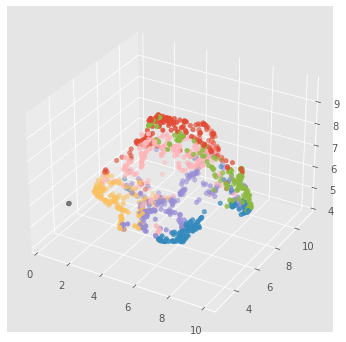

In [43]:
ax = plt.axes(projection="3d")
ax.scatter3D(
    embbeding[:, 0],
    embbeding[:, 1],
    embbeding[:, 2],
    c=[sns.color_palette()[x] for x in riders_labeled["cluster"]]
)
plt.savefig("../img/umap_clusters.pdf")